In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(      host='localhost',
                             user='root',
                             password='abc123',
                             db='TPF2',
                             #charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()

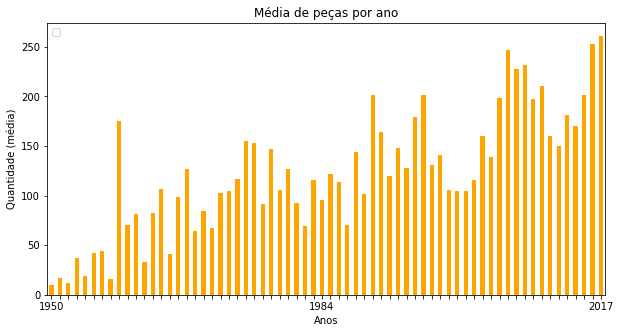

In [4]:
'''
Consulta com Relatório 1

Como o tamanho dos conjuntos da LEGO têm se alterado ao longo dos anos?
'''

query = "SELECT year, AVG(num_parts) AS media_num_parts FROM sets GROUP BY year ORDER BY year"
cursor.execute(query)
result = cursor.fetchall()
df1 = pd.DataFrame(result)
df1
df1['media_num_parts'] = df1['media_num_parts'].astype(float)
ax = df1.plot.bar(x = 'year', y = 'media_num_parts', rot = 0, color = 'orange', figsize = (10, 5))
ax.legend([])
ax.set_xticklabels(['1950'] + [''] * 31 + ['1984'] + [''] * 32 + ['2017'])
plt.xlabel("Anos")
plt.ylabel("Quantidade (média)")
plt.title("Média de peças por ano")
plt.show()

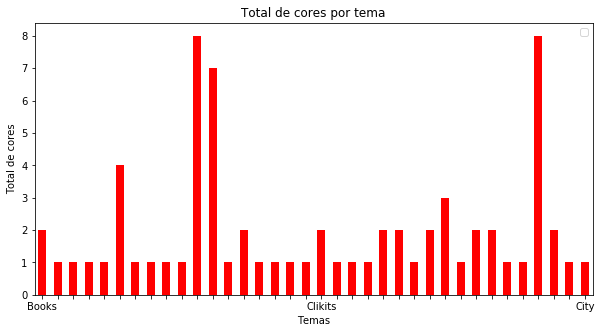

In [5]:
'''
Consulta com Relatório 2

Há uma distribuição homogênea dos temas com relação ao número de cores utilizadas?
'''

query = """
SELECT T.name, COUNT(DISTINCT color_id) AS total_cores
FROM themes T JOIN sets S ON S.theme_id = T.id
JOIN inventory_sets ISS ON ISS.set_num = S.set_num
JOIN inventory_parts IP ON IP.inventory_id = ISS.inventory_id
GROUP BY T.name
"""

cursor.execute(query)
result = cursor.fetchall()
df1 = pd.DataFrame(result)
df1.drop_duplicates()

df1['total_cores'] = df1['total_cores'].astype(int)
ax = df1.plot.bar(x = 'name', y = 'total_cores', rot = 0, color = 'red', figsize = (10, 5))
ax.legend([])
ax.set_xticklabels(['Books'] + [''] * 17 + ['Clikits'] + [''] * 16 + ['City'])
plt.xlabel("Temas")
plt.ylabel("Total de cores")
plt.title("Total de cores por tema")
plt.show()

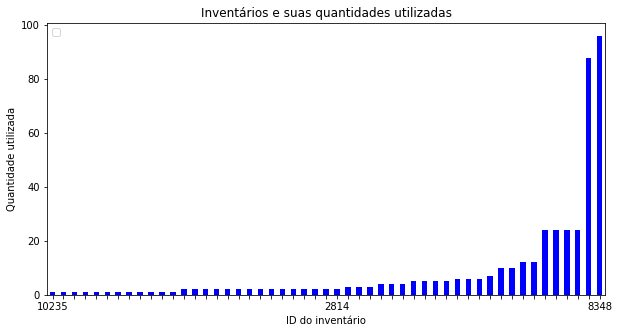

In [8]:
'''
Consulta com Relatório 3

Alguns inventários são mais utilizados que outros?
'''

query = """
SELECT IP.inventory_id, count(*) AS qtde
FROM colors C JOIN inventory_parts IP ON C.id = IP.color_id
JOIN inventory_sets ISS ON IP.inventory_id = ISS.inventory_id
JOIN sets S ON ISS.set_num = S.set_num
JOIN themes T ON S.theme_id = T.id
GROUP BY IP.inventory_id
ORDER BY qtde ASC
"""

cursor.execute(query)
result = cursor.fetchall()
df1 = pd.DataFrame(result)
#df1.drop_duplicates()
#len(df1)
df1
ax = df1.plot.bar(x = 'inventory_id', y = 'qtde', rot = 0, color = 'blue', figsize = (10, 5))
ax.legend([])
ax.set_xticklabels(['10235'] + [''] * 25 + ['2814'] + [''] * 23 + ['8348'])
plt.xlabel("ID do inventário")
plt.ylabel("Quantidade utilizada")
plt.title("Inventários e suas quantidades utilizadas")
plt.show()